In [295]:
import pandas as pd

In [296]:
df = pd.read_excel('base vf.xlsx')

In [297]:
df.shape

(12220, 5)

In [298]:
df.isna().sum()

App Version Code         1557
App Version Name         1557
customer comment date       0
Star Rating                 0
Customer_review          4320
dtype: int64

In [299]:
df = df.dropna(subset=['Customer_review'])
df = df.dropna(subset=['App Version Code'])

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6854 entries, 0 to 12219
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   App Version Code       6854 non-null   float64
 1   App Version Name       6854 non-null   object 
 2   customer comment date  6854 non-null   object 
 3   Star Rating            6854 non-null   int64  
 4   Customer_review        6854 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 321.3+ KB


In [301]:
df['Star Rating'].value_counts()

1    4450
5    1430
2     428
3     276
4     270
Name: Star Rating, dtype: int64

Text(0.5, 1.0, 'Frecuencia según Star Rating')

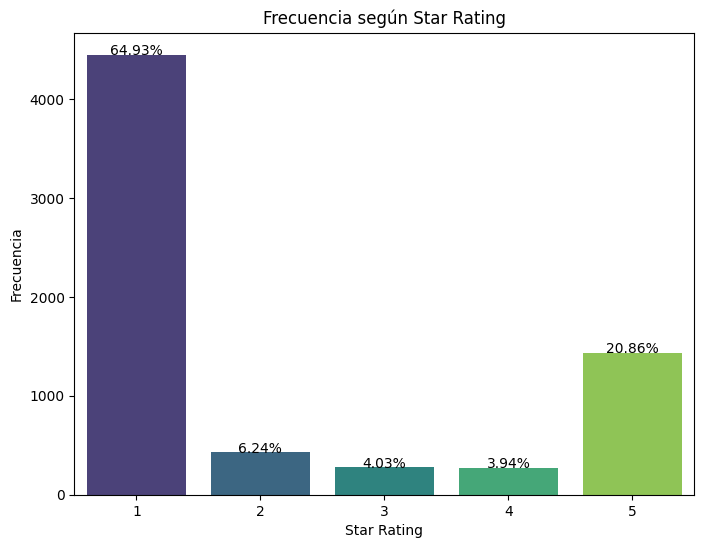

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Star Rating', data = df, palette = 'viridis')
total = float(len(df['Star Rating']))

# Generar los porcentajes y colocarlos en el extremo superior de la barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total:.2%}', ha = "center")

plt.xlabel('Star Rating')
plt.ylabel('Frecuencia')
plt.title('Frecuencia según Star Rating')


In [303]:
top_5_1 = df['App Version Code'].value_counts().nlargest(5)

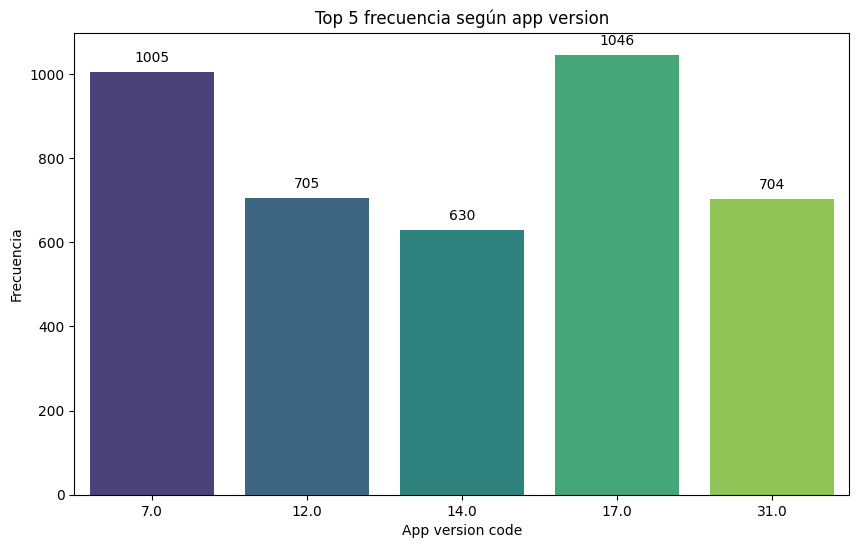

In [304]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_1.index, y=top_5_1.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('App version code')
plt.ylabel('Frecuencia')
plt.title('Top 5 frecuencia según app version')

plt.show()


In [305]:
top_5_2 = df['App Version Name'].value_counts().nlargest(5)

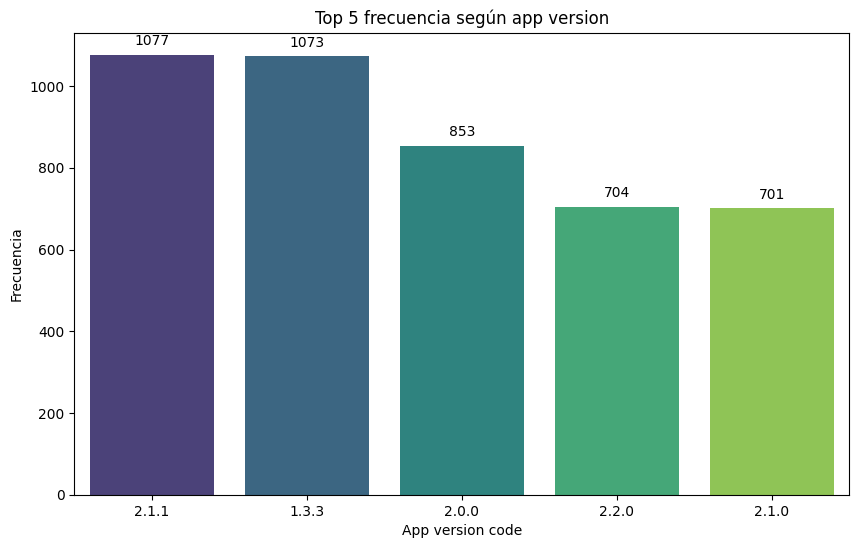

In [306]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_2.index, y=top_5_2.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('App version code')
plt.ylabel('Frecuencia')
plt.title('Top 5 frecuencia según app version')

plt.show()

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6854 entries, 0 to 12219
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   App Version Code       6854 non-null   float64
 1   App Version Name       6854 non-null   object 
 2   customer comment date  6854 non-null   object 
 3   Star Rating            6854 non-null   int64  
 4   Customer_review        6854 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 321.3+ KB


In [308]:
resumen_version = df.groupby('App Version Code')['Star Rating'].describe()

In [309]:
resumen_version

,count,mean,std,min,25%,50%,75%,max
App Version Code,,,,,,,,
2.0,35.0,3.314286,1.676331,1.0,2.0,3.0,5.0,5.0
4.0,101.0,3.069307,1.812498,1.0,1.0,3.0,5.0,5.0
5.0,68.0,1.058824,0.293326,1.0,1.0,1.0,1.0,3.0
7.0,1005.0,1.910448,1.525984,1.0,1.0,1.0,2.0,5.0
11.0,148.0,1.540541,1.263719,1.0,1.0,1.0,1.0,5.0
12.0,705.0,2.262411,1.742864,1.0,1.0,1.0,4.0,5.0
13.0,71.0,1.492958,1.181685,1.0,1.0,1.0,1.0,5.0
14.0,630.0,2.849206,1.861959,1.0,1.0,2.0,5.0,5.0
15.0,31.0,2.870968,1.802627,1.0,1.0,2.0,5.0,5.0


In [310]:
df.loc[df['Star Rating'] > 5] 

,App Version Code,App Version Name,customer comment date,Star Rating,Customer_review


# BoxPlot



In [311]:
df_fliltrado_t5 = df[df['App Version Code'].isin(df['App Version Code'].unique()[10:15])]

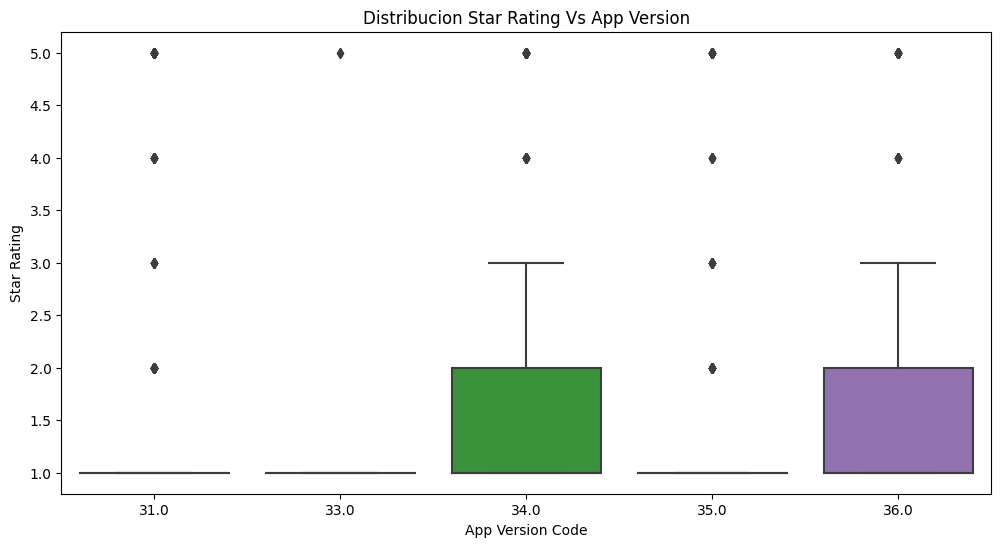

In [312]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='App Version Code', y = 'Star Rating', data=df_fliltrado_t5)
plt.title('Distribucion Star Rating Vs App Version')
plt.show()


ANOVA Star Ratings vs App Version

In [313]:
from scipy.stats import f_oneway

versiones = df['App Version Code'].unique()
grupos = [df[df['App Version Code'] == version]['Star Rating'] for version in versiones]

resultado_anova = f_oneway(*grupos)

In [314]:
resultado_anova

F_onewayResult(statistic=55.455116886285246, pvalue=2.4041212104276506e-205)

Del resultado podemos observar que el nivel de significancia de la prueba(p-valor) es menor a 0.05 por ende se puede conlcuir que la media de Star Rating depende de la version de la App

Limpieza

In [315]:
df['Customer_review']

0        Que chevere, así no podré llamar para aveguria...
1        Excelente opción para conocer los saldos de mi...
2                                       Me parece muy útil
3        Excelente. Ya era hora de poder consultar el s...
4        No me ha sido util por que no da la opcion de ...
                               ...                        
12213    No funciona,es muy lenta,no abre varias opcion...
12216    Regular siempre me toca quejarme para que pued...
12217    A veces no se puede acceder y tampoco deja hac...
12218    Pésima, sigue sin funcionar, ya escribí al cor...
12219    Es mala.. no la recomiendo. Uno le da la opció...
Name: Customer_review, Length: 6854, dtype: object

## Análisis de Sentimientos

Con Hugging Face (Toma Mucho Tiempo)

In [ ]:
from transformers import pipeline

In [ ]:

def analyze_sentiment_hugging_face(comment):
    sentiment_analyzer = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')
    result = sentiment_analyzer(comment)[0]

    if result['label'] == 'POSITIVE':
        return 'Positive'
    elif result['label'] == 'NEGATIVE':
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['Satisfaction_hugg'] = df['Customer_review'].apply(analyze_sentiment_hugging_face)
df['Satisfaction_hugg'].value_counts()

Con NLTK

In [316]:
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment_vader(comment):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(comment)
    compound_score = sentiment_score['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif -0.05 < compound_score < 0.05:
        return 'Neutral'
    else:
        return 'Negative'


In [317]:
df['Satisfaction_nltk'] = df['Customer_review'].apply(analyze_sentiment_vader)
df['Satisfaction_nltk'].value_counts()

Negative    3651
Neutral     2866
Positive     337
Name: Satisfaction_nltk, dtype: int64

Con TextBlob

In [318]:
from textblob import TextBlob
from transformers import pipeline
import spacy

In [319]:
def assign_satisfaction(text):
    analysis = TextBlob(text)

    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [320]:
df['Satisfaction_TextBlob'] = df['Customer_review'].apply(assign_satisfaction)
df['Satisfaction_TextBlob'].value_counts()

Neutral     6370
Negative     247
Positive     237
Name: Satisfaction_TextBlob, dtype: int64

Con SpaCy: (Toma demasiado tiempo) 

In [ ]:
nlp_es = spacy.load('es_core_news_sm')

In [ ]:
import spacy

def analyze_sentiment_spacy(comment):
    nlp = spacy.load('es_core_news_sm')
    doc = nlp(comment)

    sentiment_score = sum([sentence.sentiment for sentence in doc.sents]) / len(list(doc.sents))

    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score == 0:
        return 'Neutral'
    else:
        return 'Negative'


In [ ]:
df['Satisfaction_Scipy'] = df['Customer_review'].apply(analyze_sentiment_spacy)
df['Satisfaction_Scipy'].value_counts()

Con Pysentimento (Toma demasiado tiempo)

In [292]:
from pysentimiento import create_analyzer

In [293]:

def analyze_sentiment_pysentimiento(comment):
    
    analyzer = create_analyzer(task="sentiment", lang="es")

    
    result = analyzer.predict(comment)

    
    if result.output == "POS":
        return 'Positive'
    elif result.output == "NEG":
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
df['Satisfaction_Pysentimiento'] = df['Customer_review'].apply(analyze_sentiment_pysentimiento)
df['Satisfaction_Pysentimiento'].value_counts()

# Análisis Adicionales para Satisfaction

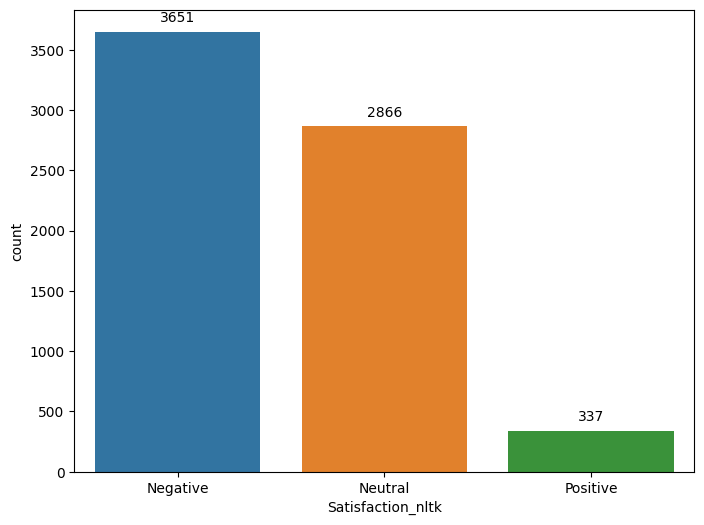

In [324]:
plt.figure(figsize=(8, 6))
plot = sns.countplot(x='Satisfaction_nltk', data=df)

for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


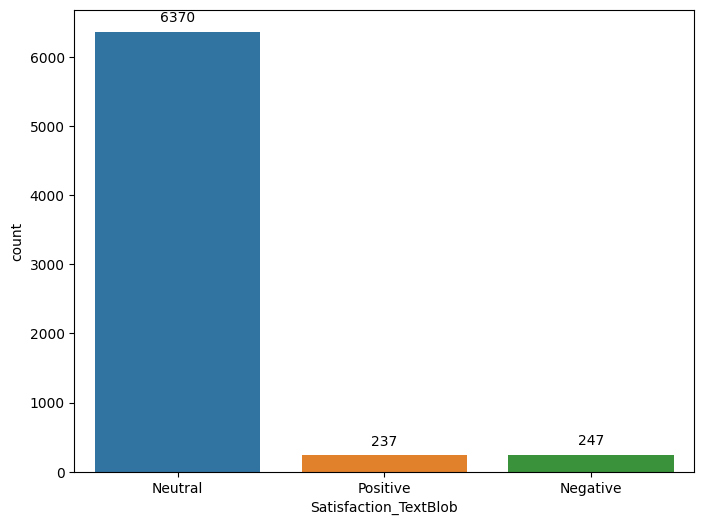

In [325]:
plt.figure(figsize=(8, 6))
plot = sns.countplot(x='Satisfaction_TextBlob', data=df)

for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Stopwords, Tokenizar

In [326]:
import nltk
from nltk.corpus import stopwords

In [327]:
ruta_nltk_data = '/Users/edwardguzman/Desktop/ML/carpeta nltk/Users/edwardguzman/Desktop/ML/carpeta nltk'

In [328]:
nltk.data.path.append(ruta_nltk_data)

In [329]:
stop_words_nltk = set(stopwords.words('spanish'))
custom = set(['que','y','la','e', 'q', 'si'])
stop_words_nltk.update(custom)

In [330]:
from nltk.tokenize import word_tokenize
import string

Funcion para tokenizar y eliminar stopwords

In [331]:
def eliminar_stopwords(texto):

    tokens = word_tokenize(texto, language = 'spanish')

    tokens_filtrados = [word.lower() for word in tokens if word.lower()
                        not in stop_words_nltk and word.lower()
                        not in string.punctuation] 
    
    textos_sin_stopwords = ' '.join(tokens_filtrados)

    return textos_sin_stopwords

In [332]:
df['review_procesada'] = df['Customer_review'].apply(eliminar_stopwords)

In [333]:
df['Customer_review'].head(3)

0    Que chevere, así no podré llamar para aveguria...
1    Excelente opción para conocer los saldos de mi...
2                                   Me parece muy útil
Name: Customer_review, dtype: object

In [334]:
df['review_procesada'].head(3)

0    chevere así podré llamar aveguriar saldo puedo...
1    excelente opción conocer saldos tarjeta compen...
2                                          parece útil
Name: review_procesada, dtype: object

In [335]:
import spacy

In [336]:
npl = spacy.load("es_core_news_sm") #lematizar

<function matplotlib.pyplot.show(close=None, block=None)>

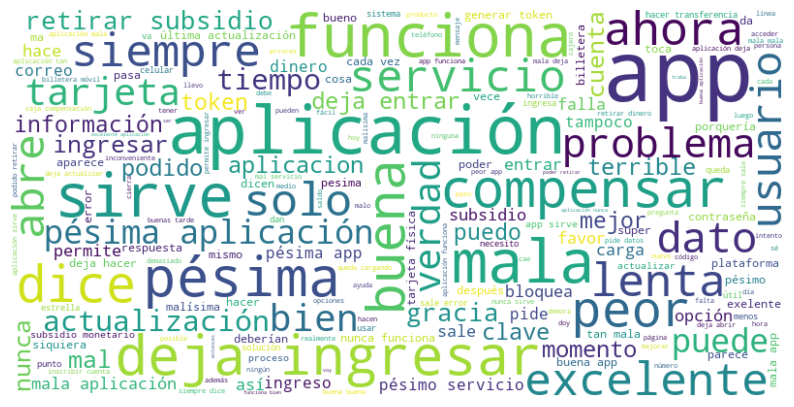

In [337]:
from wordcloud import WordCloud

text = ' '.join(df['review_procesada'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize = (10 ,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show


# Modelo de predicción

Lematizar

In [338]:
def lematizar(texto):
    doc = npl(texto)
    lemas = [token.lemma_ for token in doc]
    return ' '.join(lemas)
    

In [339]:
df['review_lematizada'] = df['review_procesada'].apply(lematizar)

In [340]:
df['review_lematizada'].tail(5)

12213    funcionar lento abrir varios opción generar va...
12216    regular siempre tocar quejar yo poder transfer...
12217    vez poder acceder tampoco dejar hacer cierto m...
12218    pésimo seguir funcionar escribí correo dar sol...
12219    malo .. recomeir dar opción generar token deja...
Name: review_lematizada, dtype: object

In [341]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Naive Bayes

In [342]:
from sklearn.naive_bayes import MultinomialNB

In [343]:
X_train, X_test, y_train, y_test = train_test_split(df['review_lematizada'], 
                                                    df['Satisfaction_nltk'], test_size=0.2, random_state=42)

In [344]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [345]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [346]:
y_pred = nb_classifier.predict(X_test_vectorized)

Evaluar

In [347]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [348]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", classification_rep)

Accuracy: 0.7855579868708972
Confusion Matrix: 
 [[678  35   0]
 [210 375   1]
 [ 35  13  24]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.73      0.95      0.83       713
     Neutral       0.89      0.64      0.74       586
    Positive       0.96      0.33      0.49        72

    accuracy                           0.79      1371
   macro avg       0.86      0.64      0.69      1371
weighted avg       0.81      0.79      0.77      1371



# Árbol de Decisión

In [349]:
from sklearn.tree import DecisionTreeClassifier

In [350]:
X_train, X_test, y_train, y_test = train_test_split(df['review_lematizada'], 
                                                    df['Satisfaction_nltk'], test_size=0.2, random_state=42)

In [351]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [352]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [353]:
y_pred = dt_classifier.predict(X_test_vectorized)

In [354]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [355]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", classification_rep)

Accuracy: 0.7928519328956966
Confusion Matrix: 
 [[586 110  17]
 [128 452   6]
 [ 15   8  49]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.80      0.82      0.81       713
     Neutral       0.79      0.77      0.78       586
    Positive       0.68      0.68      0.68        72

    accuracy                           0.79      1371
   macro avg       0.76      0.76      0.76      1371
weighted avg       0.79      0.79      0.79      1371



## Impresión del Árbol

In [356]:
# from sklearn import tree
# import matplotlib.pyplot as plt

In [ ]:
# plt.figure(figsize=(12, 10))
# tree.plot_tree(dt_classifier, feature_names = vectorizer.get_feature_names_out(), class_names = df['Satisfaction_nltk'].unique(),
#                filled = True, rounded=True)

# plt.show()

# Gradient Boosting

In [358]:
from sklearn.ensemble import GradientBoostingClassifier

In [359]:
X_train, X_test, y_train, y_test = train_test_split(df['review_lematizada'], 
                                                    df['Satisfaction_nltk'], test_size = 0.3, random_state=42)

In [360]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [361]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_vectorized, y_train)

GradientBoostingClassifier()

In [362]:
y_pred = gb_classifier.predict(X_test_vectorized)

In [363]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [364]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", classification_rep)

Accuracy: 0.8371414681575109
Confusion Matrix: 
 [[935 130  16]
 [149 713   1]
 [ 21  18  74]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.85      0.86      0.86      1081
     Neutral       0.83      0.83      0.83       863
    Positive       0.81      0.65      0.73       113

    accuracy                           0.84      2057
   macro avg       0.83      0.78      0.80      2057
weighted avg       0.84      0.84      0.84      2057



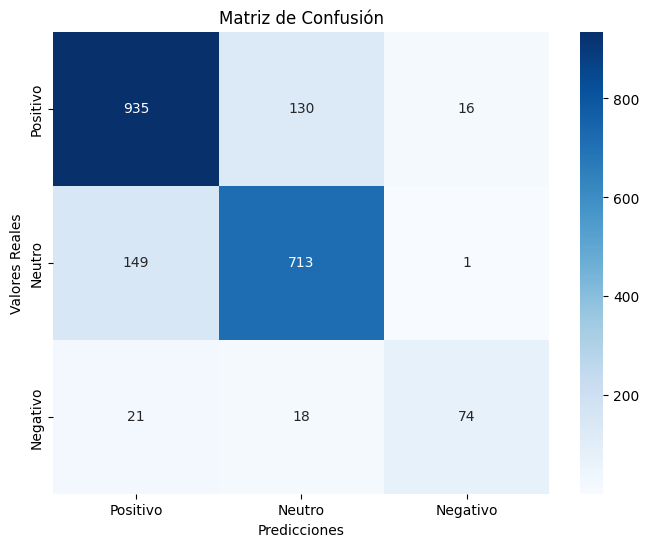

In [365]:
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot= True, fmt='d', cmap='Blues',
            xticklabels=['Positivo', 'Neutro','Negativo'],
            yticklabels=['Positivo','Neutro','Negativo'])

plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')

plt.show()

In [366]:
from sklearn.feature_extraction.text import TfidfTransformer

In [367]:
X_nuevo = ['Me parece horrible']  
X_nuevo_vectorizado = vectorizer.transform(X_nuevo)
prediccion = gb_classifier.predict(X_nuevo_vectorizado)

print(f"Comentario: {X_nuevo[0]}")
print(f"Predicción del modelo: {prediccion}")

Comentario: Me parece horrible
Predicción del modelo: ['Negative']


## Validación cruzada

In [368]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

gb_classifier = GradientBoostingClassifier()

pipeline = make_pipeline(CountVectorizer(), gb_classifier)

X = df['review_lematizada']
y = df['Satisfaction_nltk']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

print("Puntuaciones de precisión para cada pliege: ", cross_val_scores)
print(f"Precisión Media: {cross_val_scores.mean()}")
print(f"Desviación estándar de precisión: {cross_val_scores.std()}")


Puntuaciones de precisión para cada pliege:  [0.84172137 0.84026258 0.837345   0.85557987 0.84233577]
Precisión Media: 0.8434489184196096
Desviación estándar de precisión: 0.006305457896774603


Hiperparmatetros

In [369]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

X = df['review_lematizada']
y = df['Satisfaction_nltk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline = make_pipeline(CountVectorizer(), GradientBoostingClassifier())

param_grid = {
'countvectorizer__max_features': [1000, 5000, None],
'gradientboostingclassifier__n_estimators': [50, 100, 200], 
'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2], 
'gradientboostingclassifier__max_depth': [3, 5, 7] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)